# Data Mining Coursework Part. 1

# I worked and submitted alone


BSc Computer Science 33680787 Seonjoo Hwang


# Workflow

1. Problem Definition

2. Data Collection and Inspection

3. Data Preprocessing and Visualisation

4. Model Training

5. Evaluation

6. Conclusion

# 1. Problem Definition

**Objective**

The primary goal is to classify objects as either rock (R) or metal cylinder (M) based on sonar signal measurements.

Each object is described by 60 features, which represent various sonar signal properties.


**Tasks**

Implement simple Nearest Neighbour algorithm using the Minkowski distance.

Classify test records by finding the nearest neighbour in the training set.

Evaluate the model performance using metrics like accuracy, recall, precision, and F1 score.

# 2. Data Collection and Inspection

**Exploratory Data Analysis (EDA)**

Quick Look at the Data Structure


In [ ]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('/content/drive/MyDrive/DM/sonar_train.csv', skiprows=1, header=None)
test_data = pd.read_csv('/content/drive/MyDrive/DM/sonar_test.csv', skiprows=1, header=None)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       139 non-null    float64
 1   1       139 non-null    float64
 2   2       139 non-null    float64
 3   3       139 non-null    float64
 4   4       139 non-null    float64
 5   5       139 non-null    float64
 6   6       139 non-null    float64
 7   7       139 non-null    float64
 8   8       139 non-null    float64
 9   9       139 non-null    float64
 10  10      139 non-null    float64
 11  11      139 non-null    float64
 12  12      139 non-null    float64
 13  13      139 non-null    float64
 14  14      139 non-null    float64
 15  15      139 non-null    float64
 16  16      139 non-null    float64
 17  17      139 non-null    float64
 18  18      139 non-null    float64
 19  19      139 non-null    float64
 20  20      139 non-null    float64
 21  21      139 non-null    float64
 22  22

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       69 non-null     float64
 1   1       69 non-null     float64
 2   2       69 non-null     float64
 3   3       69 non-null     float64
 4   4       69 non-null     float64
 5   5       69 non-null     float64
 6   6       69 non-null     float64
 7   7       69 non-null     float64
 8   8       69 non-null     float64
 9   9       69 non-null     float64
 10  10      69 non-null     float64
 11  11      69 non-null     float64
 12  12      69 non-null     float64
 13  13      69 non-null     float64
 14  14      69 non-null     float64
 15  15      69 non-null     float64
 16  16      69 non-null     float64
 17  17      69 non-null     float64
 18  18      69 non-null     float64
 19  19      69 non-null     float64
 20  20      69 non-null     float64
 21  21      69 non-null     float64
 22  22  

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R


# 3. Data Preprocessing

**Exploratory Data Analysis (EDA)**

60 feature columns (A1 to A60):

Represent various measurements from the sonar signals.

1 label column (Class):

Contains the class label for each record, either "R" for rock or "M" for metal cylinder.

In [ ]:
# # Check for missing values
train_data.isnull().sum()
test_data.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Feature Scaling

Feature scaling is important when using the Nearest Neighbour model.


The Nearest Neighbour algorithm relies on calculating distances between data points. If the features have different scales, features with larger ranges will dominate the distance calculations, leading to biased results. For example, if one feature ranges from 1 to 1000 and another from 0 to 1, the distance measure will be heavily influenced by the first feature.

Balanced distance calculation improves performance of the Nearest Neighbour algorithm.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data (excluding the label)
train_features = train_data.iloc[:, :-1]
train_labels = train_data[60]
train_features_scaled = scaler.fit_transform(train_features)

# Transform the test data (using the same scaler fitted on the training data)
test_features = test_data.iloc[:, :-1]
test_labels = test_data[60]
test_features_scaled = scaler.transform(test_features)

# Combine the scaled features with labels back into DataFrames
train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled[60] = train_labels

test_scaled = pd.DataFrame(test_features_scaled, columns=test_features.columns)
test_scaled[60] = test_labels

# Encoding

Identify location of categorical column : Last column


60  60      69 non-null     object

dtypes: float64(60), object(1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

train_encoded = train_scaled.copy()
test_encoded = test_scaled.copy()

# Encode the 'Class' column in both train and test datasets
train_encoded[train_scaled.columns[-1]] = label_encoder.fit_transform(train_encoded[train_scaled.columns[-1]])
test_encoded[test_scaled.columns[-1]] = label_encoder.fit_transform(test_encoded[test_scaled.columns[-1]])

# # Display the first few rows of the modified train dataset to verify the changes
train_encoded.head(), test_encoded.head()

(         0         1         2         3         4         5         6   \
 0  0.049307  0.029716  0.013141  0.045649  0.070251  0.149596  0.150502   
 1  0.449923  0.196813  0.158673  0.078222  0.243216  0.226078  0.249316   
 2  0.060092  0.108527  0.066360  0.066809  0.060360  0.360512  0.430830   
 3  0.104777  0.130491  0.191853  0.235854  0.277961  0.549865  0.500456   
 4  0.232666  0.404393  0.429041  0.320970  0.407558  0.541779  0.212223   
 
          7         8         9   ...        51        52        53        54  \
 0  0.199118  0.138309  0.181362  ...  0.239658  0.342697  0.228070  0.208617   
 1  0.086439  0.150896  0.027369  ...  0.007133  0.000000  0.634503  0.460317   
 2  0.128556  0.098475  0.202148  ...  0.291013  0.241573  0.134503  0.181406   
 3  0.234620  0.120539  0.175299  ...  0.075606  0.028090  0.216374  0.276644   
 4  0.296803  0.297349  0.575091  ...  0.275321  0.682584  0.353801  0.145125   
 
          55        56        57        58        59  

# Visualisation

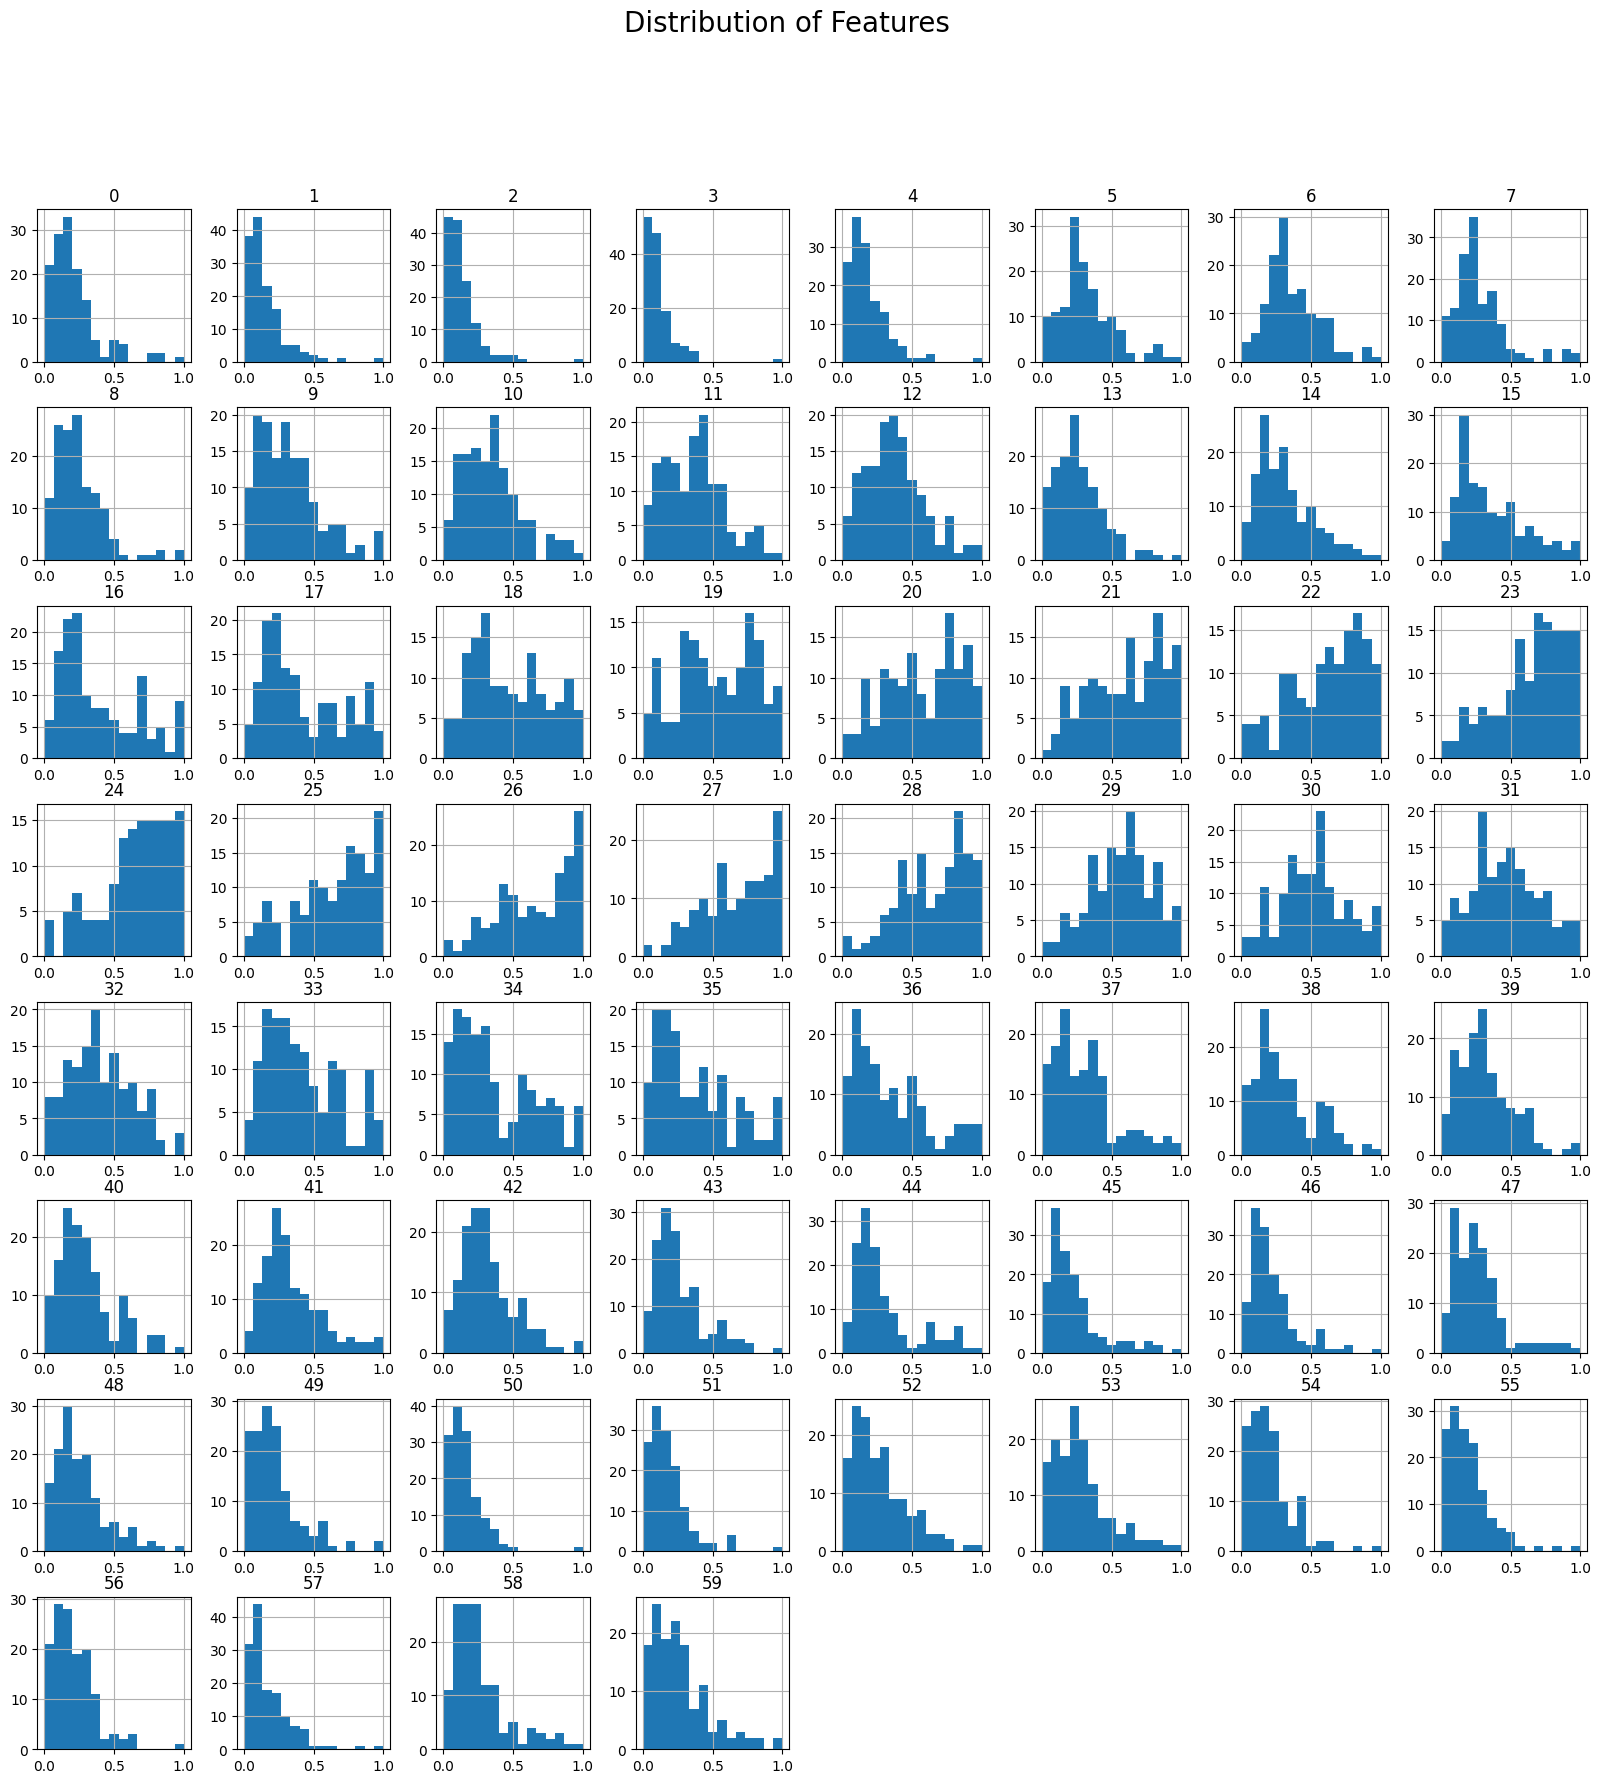

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of the first few features
train_encoded.iloc[:, :-1].hist(bins=15, figsize=(20, 20), layout=(8, 8))
plt.suptitle('Distribution of Features', size=20)
plt.show()


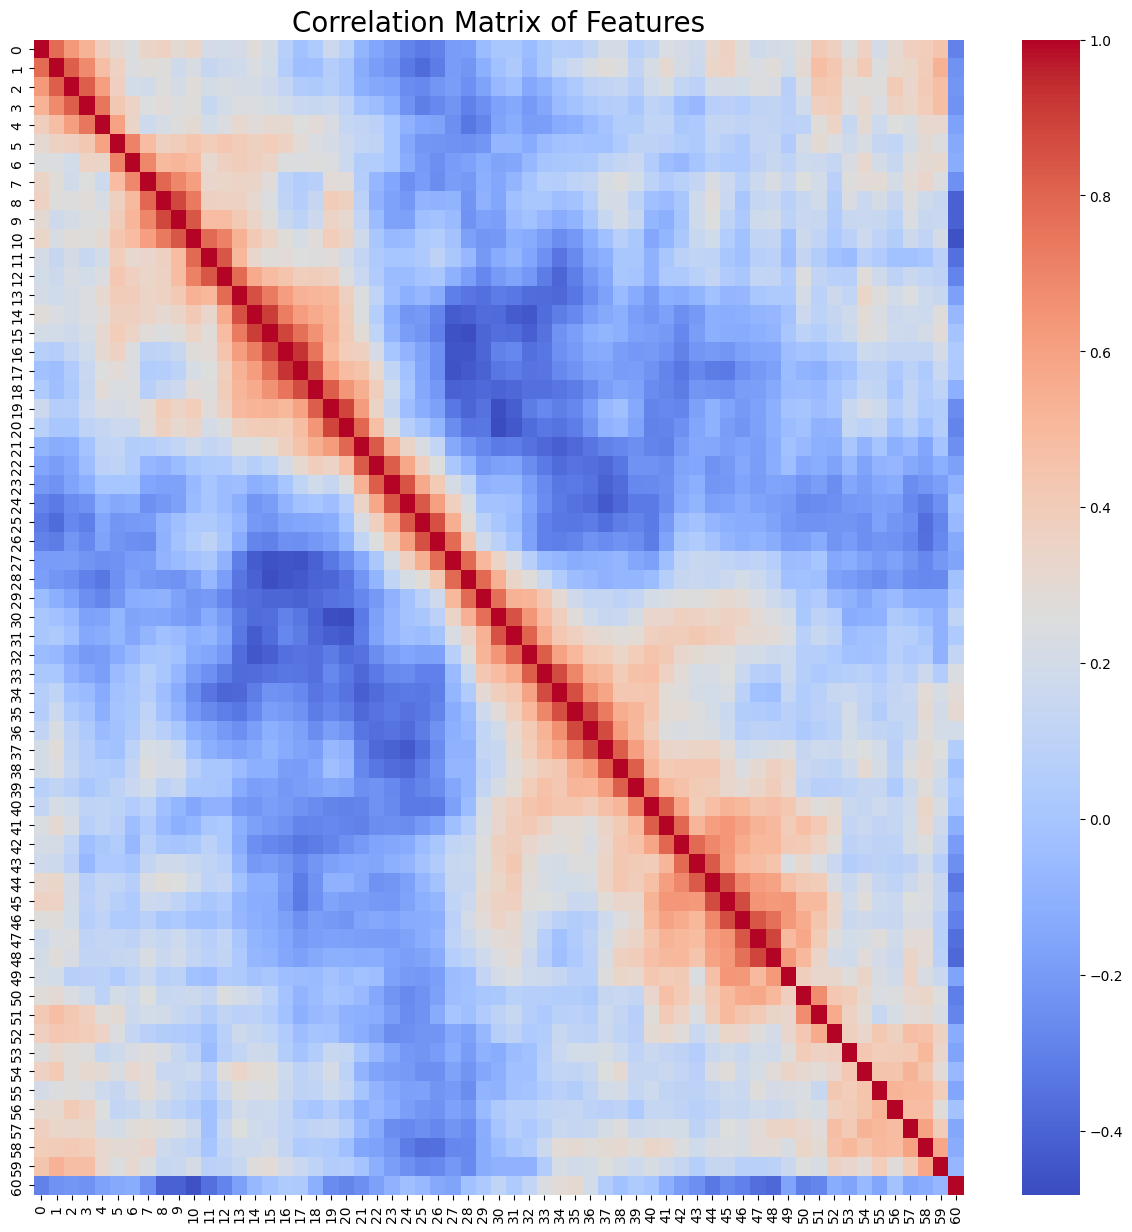

,60
60,1.000000
35,0.305466
34,0.286802
33,0.241582
36,0.198991
32,0.123943
30,0.110884
37,0.055007
31,0.034168
39,0.033632


In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = train_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', size=20)
plt.show()

# Display the correlation with the target variable
correlation_with_target = correlation_matrix[train_encoded.columns[-1]].sort_values(ascending=False)
correlation_with_target


# 4. Model Training

# Minkowski Distance Function

We define the Minkowski distance function which will be used to calculate distances between data points.

Minkowski distance is a generalized metric in a normed vector space, which includes several other distance metrics as particular cases, depending on the value of the parameter p.

In [ ]:
from collections import Counter
import numpy as np

def minkowski_distance(x, y, p):
    return (np.sum(np.abs(x - y) ** p)) ** (1 / p)

# Nearest Neighbour Classification Function


1. Calculate the Distance between test point and all points in the training set.

2. Find Nearest Neighbour: the training point with the smallest distance to the test point.

3. Assign the Class with the highest frequency among the nearest neighbours to the test point.

To classify a record from the test set you need to find its nearest neighbour in the training set (this is the one which minimizes the distance to the test set record); take the class of the nearest neighbour as the predicted class for the test set record.


In [ ]:
# Spliting dataset into features and labels for easier calculation

train_encoded_features = train_encoded.iloc[:, :-1].values
train_encoded_labels = train_encoded.iloc[:, -1].values

test_encoded_features = test_encoded.iloc[:, :-1].values
test_encoded_labels = test_encoded.iloc[:, -1].values


In [ ]:
def nearest_neighbour_classification(training_feature, training_labels, testing_features, p):
    predictions = []
    for test_point in testing_features:
        distances = [minkowski_distance(test_point, train_point, p) for train_point in training_feature]
        nearest_neighbour_index = np.argmin(distances)
        predictions.append(training_labels[nearest_neighbour_index])
    return predictions

# 5. Evaluate

Evaluate the predictions with respect to the class "M" which is encoded to 1

# Nearest Neighbour Classification Performance Metrics


**Accuracy**

The overall correctness of the model, but it can be misleading in imbalanced datasets if the majority class dominates.

**Precision**

Indicates how many of the predicted positive cases are actually positive. High precision means low false positive rate.

**Recall**

Measures how many actual positive cases were correctly identified. High recall means low false negative rate.

**F1 Score**

Useful when the class distribution is imbalanced and provides a balance between precision and recall. Higher values indicate better model performance.

**1. Manhattan Distance (p=1)**



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

md_pred = nearest_neighbour_classification(train_encoded_features, train_encoded_labels, test_encoded_features, 1)

accuracy = accuracy_score(test_encoded_labels, md_pred)
precision = precision_score(test_encoded_labels, md_pred, pos_label=1)
recall = recall_score(test_encoded_labels, md_pred, pos_label=1)
f1 = f1_score(test_encoded_labels, md_pred, pos_label=1)

print(f"Results for Minkowski distance with p=1 (Manhattan Distance):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Results for Minkowski distance with p=1 (Manhattan Distance):
Accuracy: 0.927536231884058
Precision: 0.9655172413793104
Recall: 0.875
F1 Score: 0.9180327868852458



**2. Euclidean Distance (p=2)**

In [ ]:
ed_pred = nearest_neighbour_classification(train_encoded_features, train_encoded_labels, test_encoded_features, 2)

accuracy = accuracy_score(test_encoded_labels, ed_pred)
precision = precision_score(test_encoded_labels, ed_pred, pos_label=1)
recall = recall_score(test_encoded_labels, ed_pred, pos_label=1)
f1 = f1_score(test_encoded_labels, ed_pred, pos_label=1)

print(f"Results for Minkowski distance with p=1 (Euclidean Distance):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print()

Results for Minkowski distance with p=1 (Euclidean Distance):
Accuracy: 0.927536231884058
Precision: 0.9655172413793104
Recall: 0.875
F1 Score: 0.9180327868852458



Identical Performance:

The identical performance metrics for both Manhattan and Euclidean distances suggest that, in this specific dataset and classification task, the choice between Manhattan and Euclidean distances does not affect the model's performance. This could be due to the nature of the data or the effectiveness of feature scaling, which ensures all features contribute equally to the distance calculations.


Data Characteristics:

The Sonar dataset might have characteristics such that the geometric structure of the data (captured by Euclidean distance) and the absolute difference (captured by Manhattan distance) are similarly effective for distinguishing between rocks and metal cylinders.


Implications:

When the performance metrics are identical for both distance measures, it may indicate that the dataset is well-prepared, and either distance metric is suitable for this classification task. However, it's generally good practice to test multiple distance metrics, as different datasets can have different characteristics that might favor one metric over another.

In summary, for this Sonar dataset, both Manhattan and Euclidean distances provide excellent classification performance, and either can be used effectively.

# 6. Conclusion